<a href="https://colab.research.google.com/github/ssong86/german-credit-analysis/blob/master/german_credit_analysis_SangwonSong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Usage of German Credit Data** <br>
**Sangwon Song**

###**1. Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc** ###
The analysis in this notebook makes use of the German Credit Dataset obtained from the class Slack.
* I used only the numerical version of the dataset for this notebook
* The numerical columns were converted to string variables (C1, C2 are converted to correspoding attributes
* The dataset is located in https://drive.google.com/drive/u/1/folders/1VIxMNqd5RLXZrq61Zaet9RGvhYvRl4iM
* This notebook is structured by suggestion of Mahchine Learning Life-cycle in the class website

###**2. Data Collection: Inital Data Set**###

In [0]:
# import dataset
from google.colab import drive
drive.mount('/content/drive')

# import libraries for loading data
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# load the data
german_data_csv = "/content/drive/My Drive/MLFall2019/crimerate-seers/MidtermData/GermanDataNumeric.csv"
german_data = pd.read_csv(german_data_csv, header=0)
german_data.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


StatusCheckingAccount  ...  CostMatrix
0                      1  ...           1
1                      2  ...           2
2                      4  ...           1
3                      1  ...           1
4                      1  ...           2

[5 rows x 25 columns]

In [0]:
german_data.shape

(1000, 25)

In [0]:
german_data.describe()

StatusCheckingAccount  ...   CostMatrix
count            1000.000000  ...  1000.000000
mean                2.577000  ...     1.300000
std                 1.257638  ...     0.458487
min                 1.000000  ...     1.000000
25%                 1.000000  ...     1.000000
50%                 2.000000  ...     1.000000
75%                 4.000000  ...     2.000000
max                 4.000000  ...     2.000000

[8 rows x 25 columns]

###**3. Set Data Narrative: Set Business Objectives, what use case are you solving for**###
In this note book, I processed data analysis of German Credit dataset.
As a data narrative and business model, I focused on that if a customer has risk in his/her credits and suggested whether the bank could provide services such as loan or mortgage. Based on the information of the customer, I clustered and classified into groups to be trustful and safe to provide the services.

###**4. Exploratory Data Analysis and Visualization**###

**4.1 Feature analysis and engineering (for ML, for DL it's feature extraction)**

In [0]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
StatusCheckingAccount                           1000 non-null int64
DurationMonth                                   1000 non-null int64
CreditHistory                                   1000 non-null int64
CreditAmount                                    1000 non-null int64
SavingsAccount/bonds                            1000 non-null int64
PresentEmployment                               1000 non-null int64
PersonalStatusAndSex                            1000 non-null int64
PresentResidence                                1000 non-null int64
Property                                        1000 non-null int64
AgeInYears                                      1000 non-null int64
OtherInstallmentPlans                           1000 non-null int64
NoOfExistingCreditsAtThisBank                   1000 non-null int64
NoOfPeopleBeingLiableToProvideMaintenanceFor    1000 non-null int64
Telephone 

In [0]:
german_data.describe()

StatusCheckingAccount  ...   CostMatrix
count            1000.000000  ...  1000.000000
mean                2.577000  ...     1.300000
std                 1.257638  ...     0.458487
min                 1.000000  ...     1.000000
25%                 1.000000  ...     1.000000
50%                 2.000000  ...     1.000000
75%                 4.000000  ...     2.000000
max                 4.000000  ...     2.000000

[8 rows x 25 columns]

**4.2 Analyze data**

In [0]:
german_data.head()

StatusCheckingAccount  ...  CostMatrix
0                      1  ...           1
1                      2  ...           2
2                      4  ...           1
3                      1  ...           1
4                      1  ...           2

[5 rows x 25 columns]

**4.3 Visualize data**

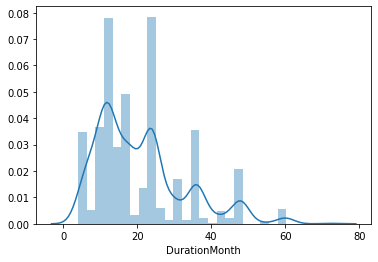

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(german_data['DurationMonth'])

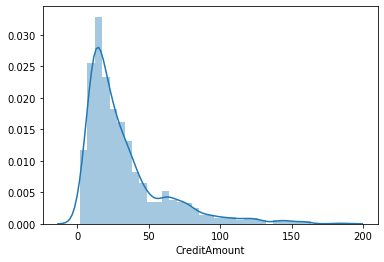

In [0]:
sns.distplot(german_data['CreditAmount'])

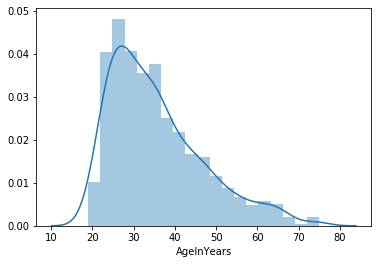

In [0]:
sns.distplot(german_data['AgeInYears'])

<Figure size 432x288 with 0 Axes>

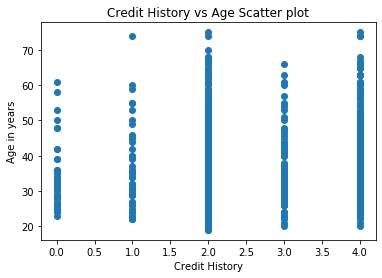

<Figure size 432x288 with 0 Axes>

In [0]:
plt.scatter(german_data['CreditHistory'],german_data["AgeInYears"])
plt.title('Credit History vs Age Scatter plot')
plt.xlabel("Credit History")
plt.ylabel("Age in years")
plt.figure()

<Figure size 432x288 with 0 Axes>

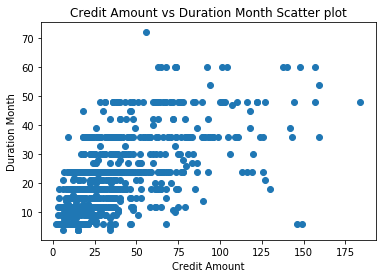

<Figure size 432x288 with 0 Axes>

In [0]:
#Plot Credit Amount V/s Duration Month
plt.scatter(german_data['CreditAmount'],german_data["DurationMonth"])
plt.title('Credit Amount vs Duration Month Scatter plot')
plt.xlabel("Credit Amount")
plt.ylabel("Duration Month")
plt.figure()

**4.4 Run Stats: mean, median, mode, correlation, variance**

In [0]:
#mean of the dataset
mean_german_data = german_data.mean()
mean_german_data

StatusCheckingAccount                            2.577
DurationMonth                                   20.903
CreditHistory                                    2.545
CreditAmount                                    32.711
SavingsAccount/bonds                             2.105
PresentEmployment                                3.384
PersonalStatusAndSex                             2.682
PresentResidence                                 2.845
Property                                         2.358
AgeInYears                                      35.546
OtherInstallmentPlans                            2.675
NoOfExistingCreditsAtThisBank                    1.407
NoOfPeopleBeingLiableToProvideMaintenanceFor     1.155
Telephone                                        1.404
ForeignWorker                                    1.037
NewCar                                           0.234
UsedCar                                          0.103
None_Guarantors                                  0.907
Co-applica

In [0]:
#median of the dataset
median_german_data = german_data.median()
median_german_data

StatusCheckingAccount                            2.0
DurationMonth                                   18.0
CreditHistory                                    2.0
CreditAmount                                    23.0
SavingsAccount/bonds                             1.0
PresentEmployment                                3.0
PersonalStatusAndSex                             3.0
PresentResidence                                 3.0
Property                                         2.0
AgeInYears                                      33.0
OtherInstallmentPlans                            3.0
NoOfExistingCreditsAtThisBank                    1.0
NoOfPeopleBeingLiableToProvideMaintenanceFor     1.0
Telephone                                        1.0
ForeignWorker                                    1.0
NewCar                                           0.0
UsedCar                                          0.0
None_Guarantors                                  1.0
Co-applicant_Guarantors                       

In [0]:
#mode of the dataset
mod_german_data = german_data.mode()
mod_german_data

StatusCheckingAccount  ...  CostMatrix
0                      4  ...           1

[1 rows x 25 columns]

In [0]:
#correlation of the dataset
corr_german_data = german_data.corr()
corr_german_data

StatusCheckingAccount  ...  CostMatrix
StatusCheckingAccount                                      1.000000  ...   -0.350847
DurationMonth                                             -0.072013  ...    0.214927
CreditHistory                                              0.192191  ...   -0.228785
CreditAmount                                              -0.042744  ...    0.154067
SavingsAccount/bonds                                       0.222867  ...   -0.178943
PresentEmployment                                          0.106339  ...   -0.116002
PersonalStatusAndSex                                       0.043261  ...   -0.088184
PresentResidence                                          -0.042234  ...    0.002967
Property                                                  -0.032260  ...    0.142612
AgeInYears                                                 0.059751  ...   -0.091127
OtherInstallmentPlans                                      0.046841  ...   -0.109844
NoOfExistingCreditsAtThisBank                              0.076005  ...   -0.045732
NoOfPeopleBeingLiableToProvideMaintenanceFor              -0.014145  ...   -0.003015
Telephone                                                  0.066296  ...   -0.036466
ForeignWorker                                             -0.026758  ...   -0.082079
NewCar                                                    -0.069559  ...    0.096900
UsedCar                                                    0.064303  ...   -0.099791
None_Guarantors                                            0.122333  ...   -0.000751
Co-applicant_Guarantors                                   -0.050780  ...    0.062728
HousingRent                                               -0.091897  ...    0.092785
HousingOwn                                                 0.129434  ...   -0.134589
Job_unemployed/unskilled-non-resident                     -0.047152  ...    0.005951
Job_unskilled-resident                                    -0.040573  ...   -0.021822
Job _SkilledEmployee/official                              0.055183  ...   -0.013559
CostMatrix                                                -0.350847  ...    1.000000

[25 rows x 25 columns]

In [0]:
#variance of the dataset
var_german_data = german_data.var()
var_german_data

StatusCheckingAccount                             1.581653
DurationMonth                                   145.415006
CreditHistory                                     1.173148
CreditAmount                                    798.209689
SavingsAccount/bonds                              2.496471
PresentEmployment                                 1.460004
PersonalStatusAndSex                              0.501377
PresentResidence                                  1.218193
Property                                          1.102939
AgeInYears                                      129.401285
OtherInstallmentPlans                             0.497873
NoOfExistingCreditsAtThisBank                     0.333685
NoOfPeopleBeingLiableToProvideMaintenanceFor      0.131106
Telephone                                         0.241025
ForeignWorker                                     0.035667
NewCar                                            0.179423
UsedCar                                           0.0924

**4.5 .corr**

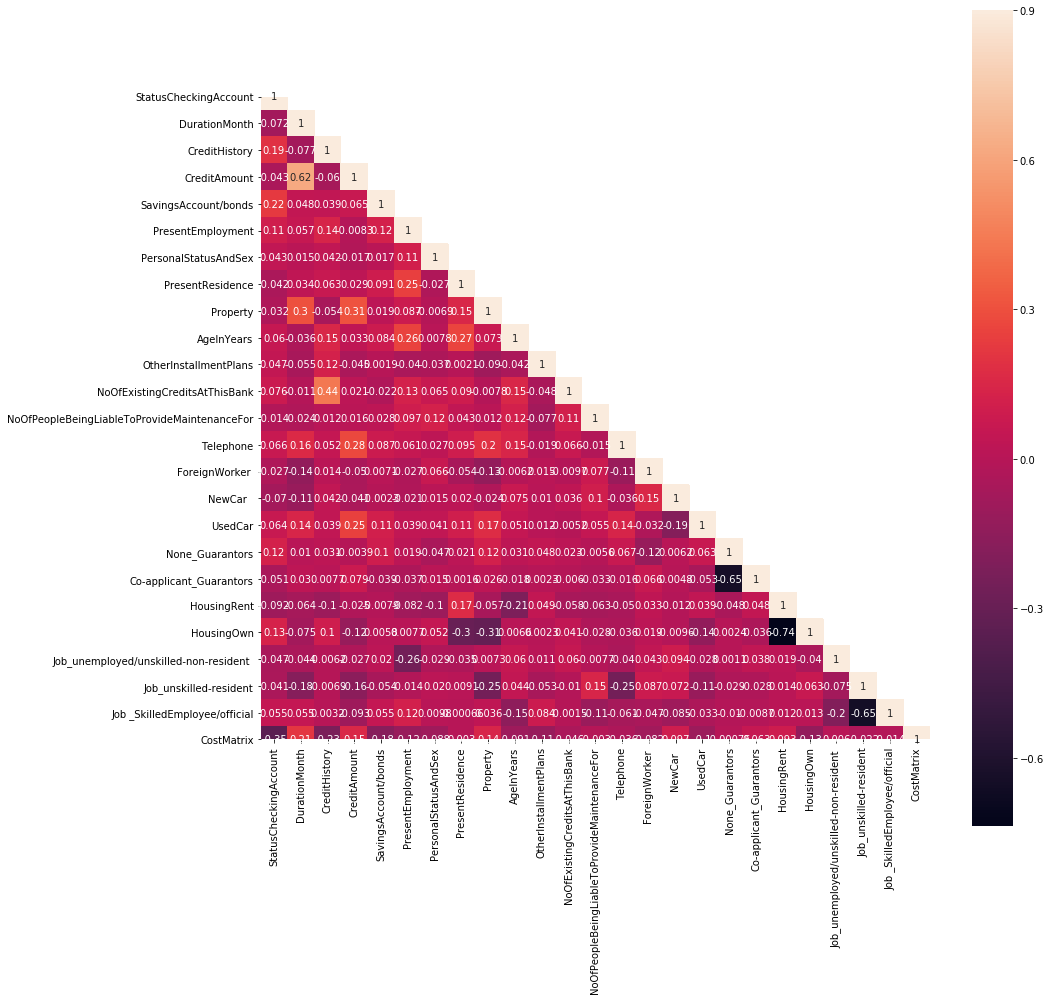

In [0]:
corr = german_data.corr(method='pearson')
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)
# correlation heatmap to visualize score of relationship

**4.6 pairplot()**

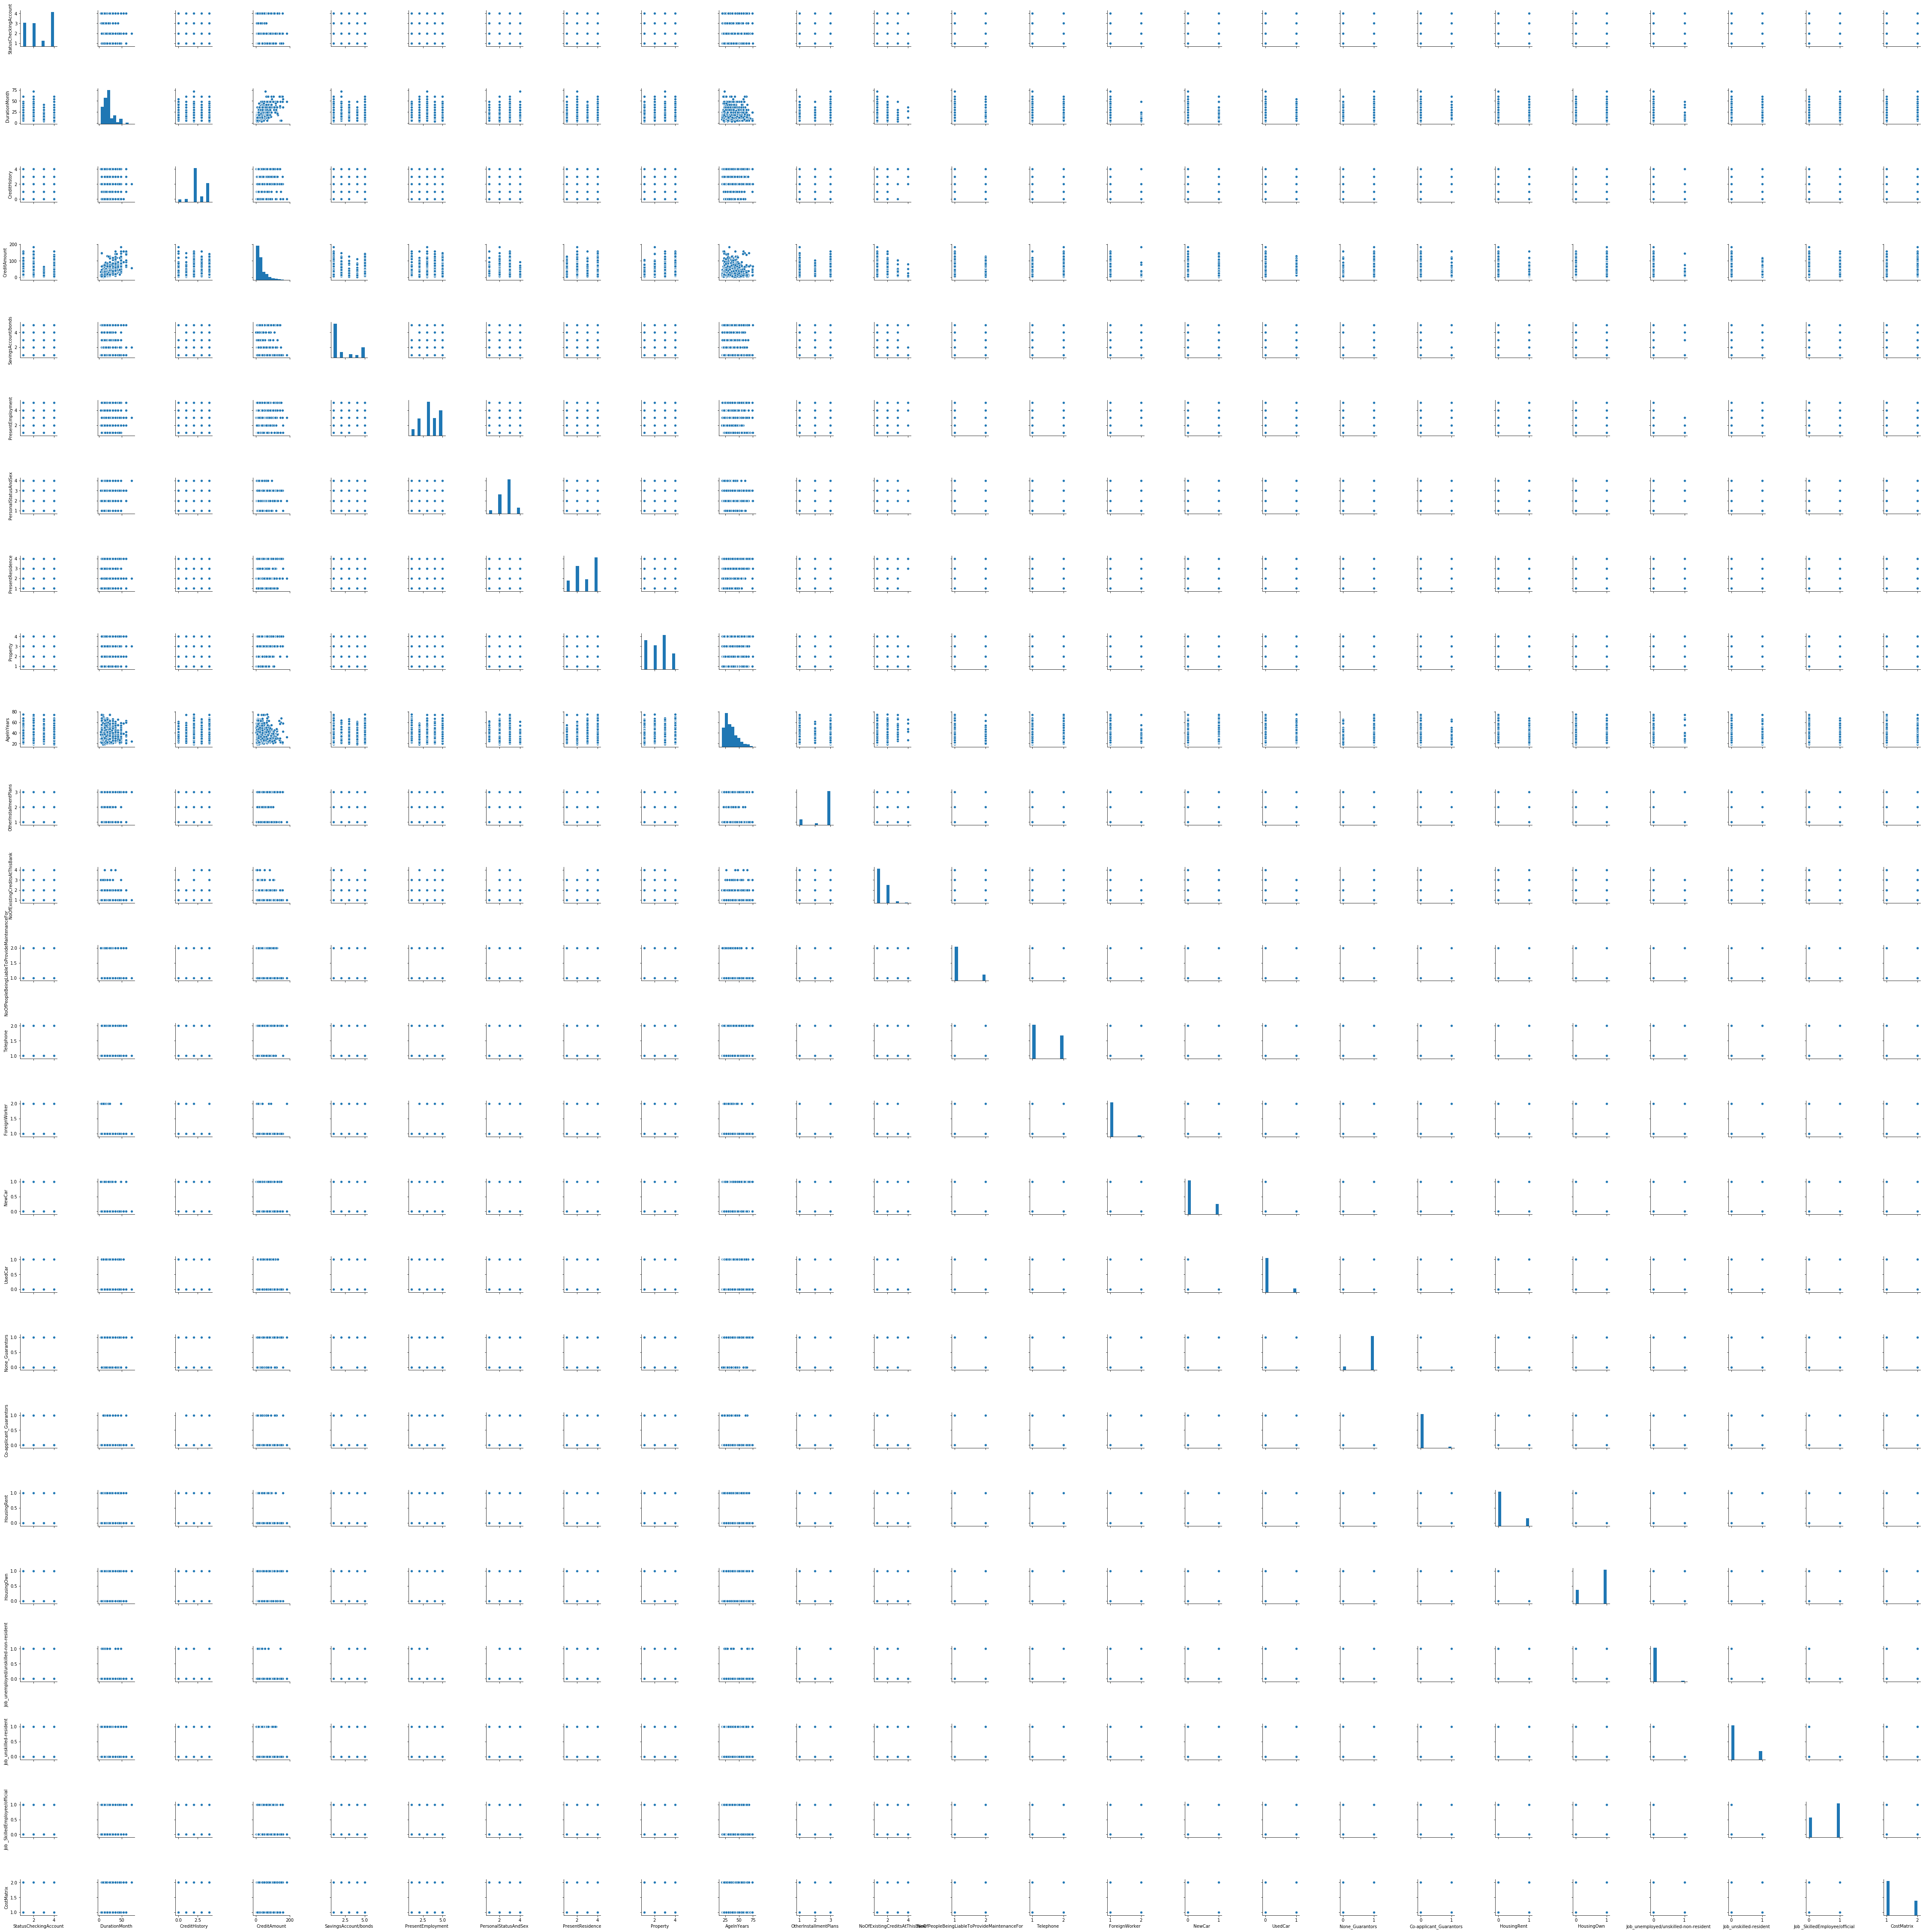

In [0]:
sns.pairplot(german_data)
# pair plot to visualize the relationship of each column

**4.7 gini score**

In [0]:
# gini coefficient function
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [0]:
# gini score for CreditAmount Column
gini_creditamount = gini(german_data['CreditAmount'].values)
print("Gini Score for Credit Amount: %0.2f" %gini_creditamount)

Gini Score for Credit Amount: 0.42


In [0]:
gini_durationMonth = gini(german_data['DurationMonth'].values)
print("Gini Score for Duration Month: %0.2f" %gini_durationMonth)

Gini Score for Duration Month: 0.31


**4.8 Feature_importance with XGboost**<br>
This secion was performed in 8.4 Feature Importance of Random Forest [Link](#feature_importance_RF)

###**5. Data Prep: Curation**###

**5.1 Feature Selection and Extraction: what are the main features to use in this dataset?**

In [0]:
german_data.CostMatrix.value_counts()

1    700
2    300
Name: CostMatrix, dtype: int64

**5.2 Data Verification: Do we have enough data?**

In [0]:
print("German Credit Data shape: {}".format(german_data.shape))

German Credit Data shape: (1000, 25)


**5.3 Possibility of Amalgamation1: Add Dataset 2**

**5.4 Data Cleansing**

*Null Check* <a name="nullCheck"></a>

In [0]:
german_data.isnull().sum()
# result: no null values

StatusCheckingAccount                           0
DurationMonth                                   0
CreditHistory                                   0
CreditAmount                                    0
SavingsAccount/bonds                            0
PresentEmployment                               0
PersonalStatusAndSex                            0
PresentResidence                                0
Property                                        0
AgeInYears                                      0
OtherInstallmentPlans                           0
NoOfExistingCreditsAtThisBank                   0
NoOfPeopleBeingLiableToProvideMaintenanceFor    0
Telephone                                       0
ForeignWorker                                   0
NewCar                                          0
UsedCar                                         0
None_Guarantors                                 0
Co-applicant_Guarantors                         0
HousingRent                                     0


> **Note:** No null values in the dataset

**5.5 & 5.6 Data Regulation & Data Normalization** <br>
Since all the data were already converted to numerical value, I converted the column names to string values

In [0]:
german_columns = german_data.columns
print(german_columns)

Index(['StatusCheckingAccount', 'DurationMonth', 'CreditHistory',
       'CreditAmount', 'SavingsAccount/bonds', 'PresentEmployment',
       'PersonalStatusAndSex', 'PresentResidence', 'Property', 'AgeInYears',
       'OtherInstallmentPlans', 'NoOfExistingCreditsAtThisBank',
       'NoOfPeopleBeingLiableToProvideMaintenanceFor', 'Telephone',
       'ForeignWorker ', 'NewCar  ', 'UsedCar', 'None_Guarantors',
       'Co-applicant_Guarantors', 'HousingRent', 'HousingOwn',
       'Job_unemployed/unskilled-non-resident ', 'Job_unskilled-resident',
       'Job _SkilledEmployee/official', 'CostMatrix'],
      dtype='object')


###**6. Unsupervised Exploration: Find relevant Clusters in Your Data**###

**6.1 How many clusters? Explore different k's**

**Elbow method to find the opitmal K** <a name="optimal_K"></a>

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
inertia = []
distortion = []
map1 = {}
map2 = {}

K_range = range(1, 10) # define number of clusters range, can't be 0 because there is no 0 clustering
for k in K_range:
  # build, fit the model
  kmeanModel = KMeans(n_clusters=k).fit(german_data)
  kmeanModel.fit(german_data)
  
  distortion.append(sum(np.min(cdist(german_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / german_data.shape[0]) 
  inertia.append(kmeanModel.inertia_) 
  
  map1[k] = sum(np.min(cdist(german_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / german_data.shape[0] 
  map2[k] = kmeanModel.inertia_
  # print(k) # for testing only, to see the number of iterations

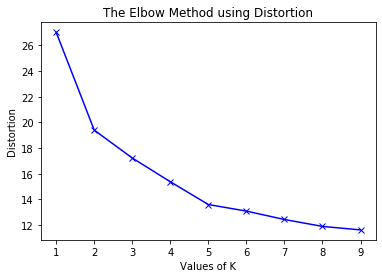

In [0]:
plt.plot(K_range, distortion, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

> **Note:** The optimal K for the dataset is K=3

**6.2 Select Clustgering algorithms, run several and compare in a table** <br>
Two popular techniques are covered in this section:
* K-Means
* GMM <br>

Clustering is an important concept in ML (Machine Learning) because it finds the similarities in dataset and group them, thus we engineers can analyze the data based on the clusters.

***Check the unique value counts to decide the data used for clusterings***

In [0]:
german_data.nunique() # count the unique value of each column in German Dataset

StatusCheckingAccount                             4
DurationMonth                                    33
CreditHistory                                     5
CreditAmount                                    125
SavingsAccount/bonds                              5
PresentEmployment                                 5
PersonalStatusAndSex                              4
PresentResidence                                  4
Property                                          4
AgeInYears                                       53
OtherInstallmentPlans                             3
NoOfExistingCreditsAtThisBank                     4
NoOfPeopleBeingLiableToProvideMaintenanceFor      2
Telephone                                         2
ForeignWorker                                     2
NewCar                                            2
UsedCar                                           2
None_Guarantors                                   2
Co-applicant_Guarantors                           2
HousingRent 

> **Note:** I used CreditAmount and AgeInYears for clustering with the most amount of the unique data.

***Scatter plot for AgeInYears vs CreditAmount***<a name="visualization"></a>

<Figure size 432x288 with 0 Axes>

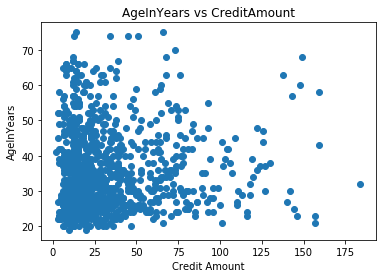

<Figure size 432x288 with 0 Axes>

In [0]:
#Scatter plot for the clustering model
plt.scatter(german_data['CreditAmount'],german_data["AgeInYears"])
plt.title('AgeInYears vs CreditAmount')
plt.xlabel("Credit Amount")
plt.ylabel("AgeInYears")
plt.figure()


***GMM Clustering***<br> <a name="GMM"></a>
A Gaussian Mixture Model (GMM) is used for clustering and its model has a mixutre of a finite number of Gaussian distributions with parameters.

Text(0, 0.5, 'Age In Years')

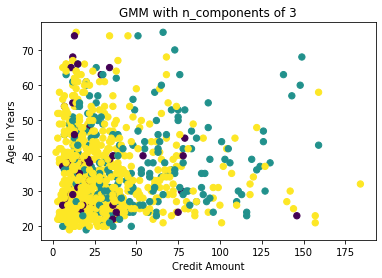

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(german_data)
labels = gmm.predict(german_data)
plt.scatter(german_data['CreditAmount'], german_data['AgeInYears'], c=labels, s=40, cmap='viridis')
plt.title("GMM with n_components of 3")
plt.xlabel('Credit Amount')
plt.ylabel('Age In Years')

***Silhouette Score for GMM***

In [0]:
from sklearn.metrics import silhouette_score
GMM_data_SC = np.array(list(zip(german_data['CreditAmount'],german_data["AgeInYears"])))
gmm = GaussianMixture(n_components=3).fit(GMM_data_SC)
labels = gmm.predict(GMM_data_SC)
silhouette_GMM = silhouette_score(GMM_data_SC, labels, metric="euclidean")
print(silhouette_GMM)

0.4758153335647269


***K-Means Clustering*** <br>
K-Means clustering is one of the unsupervised data-clustering techiques. It is a simple algorithm which finds and groups the dataset based on the similarities.

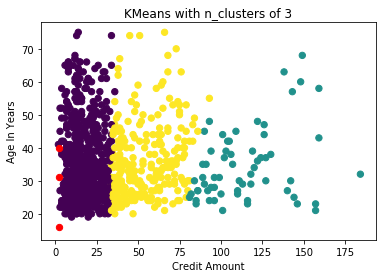

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(german_data)
plt.scatter(german_data['CreditAmount'], german_data['AgeInYears'], c=labels, s=40, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='red', label='Cluster Centers')
plt.title('KMeans with n_clusters of 3')
plt.xlabel('Credit Amount')
plt.ylabel('Age In Years')
plt.show()

***Silhouette Score for K-Means Clustering***

In [0]:
KMeans_data_SC = np.array(list(zip(german_data['CreditAmount'],german_data["AgeInYears"])))
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(KMeans_data_SC)
k_labels = kmeans.predict(KMeans_data_SC)
silhouette_KMeans = silhouette_score(KMeans_data_SC, k_labels, metric="euclidean")
print(silhouette_KMeans)

0.5100923378804118


***Silhouette Score in GMM and KMeans*** <br>

| Cluster | Silhoutte Score
| :--- | ---:
| GMM | 0.4758153335647269
| KMeans | 0.5292442161634119

From the result, I could conclude KMeans has a better model than GMM based on the silhouette scores.

**6.3 What does each cluster mean? How do they contribute to your Data Narrative (Story)** <br>
Each cluster indicates that certain data points are grouped into a group. 
The clusters have similarities among the data points. Interstingly, after K-Means clustering, the cluster centers are located in near 0 credit amount. This means many customers of the bank in Germany have not profiled their credit scores yet. For more analysis, we need to investigate other factors such as regressions and classifications to find the patterns or algorithms from the dataset. 

**6.4 Measure goodness of your clusters** <br>
This part is already answered above by the comparsion of the silhouette scores for each model.

###**7. Supervised Training Preparation: Data Curation: label your data set**###

**7.1 Classfiy Your Data Sets: Run different classfication algorithms** <br>
Classification is used to identify the categories of dataset and observe the pattern in dataset. Through the classification process, we could observe that each data belongs to a category and how the data are distributed. <br>
The example of classification is to define the survival/non-survival from nature disaster and find solutions to prevent from damage from the disaster in the future.
In this section, 3 classification techniques are coverd:
>* Naive Bayes
>* Random Forest
> * Decistion Tree <br>

In [0]:
german_data_unity = german_data
german_data_unity.head(5) # preparing the classification data

StatusCheckingAccount  ...  CostMatrix
0                      1  ...           1
1                      2  ...           2
2                      4  ...           1
3                      1  ...           1
4                      1  ...           2

[5 rows x 25 columns]

In [0]:
# These variables will be used until the end of the notebook
# I used more general terms of variables from this step
from sklearn.model_selection import train_test_split, cross_val_score
data = german_data_unity.drop('CostMatrix', axis=1)
target = german_data_unity['CostMatrix']
y_label_unity = target.unique()
y_label_char = ["Good" if x==1 else "Bad" for x in y_label_unity]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=1)

***Naive Bayes Classification*** <br>
Naive Bayes is used to classify the data based on Bayes' Theorem and provides probabilisitic classification.<br> Naive Bayes can be used for both binary and multi-class classification.

In [0]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gaussianNB = GaussianNB()
gaussianNB.fit(x_train,y_train)
y_pred_gaussianNB = gaussianNB.predict(x_test)
y_pred_gaussianNB_prob = gaussianNB.predict_proba(x_test)[:,1]
gaussianNB_accr=accuracy_score(y_pred_gaussianNB, y_test)
print("Naive Bayes Classfication Accuracy score: %0.2f" %gaussianNB_accr)

Naive Bayes Classfication Accuracy score: 0.74


***Decision Tree Classification***<br>
Decision tree is a binary classification technique in forms of a tree structure. 

In [0]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Model
DCTree_model = DecisionTreeClassifier()
DCTree_model.fit(x_train,y_train)
y_pred_DCTree = DCTree_model.predict(x_test)
y_pred_DCTree_prob = DCTree_model.predict_proba(x_test)[:,1]
DCTree_accr=accuracy_score(y_pred_DCTree, y_test)
print("Decision Tree Classfication Accuracy score: %0.2f" %DCTree_accr)

Decision Tree Classfication Accuracy score: 0.68


***Decision Tree Visualization***

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


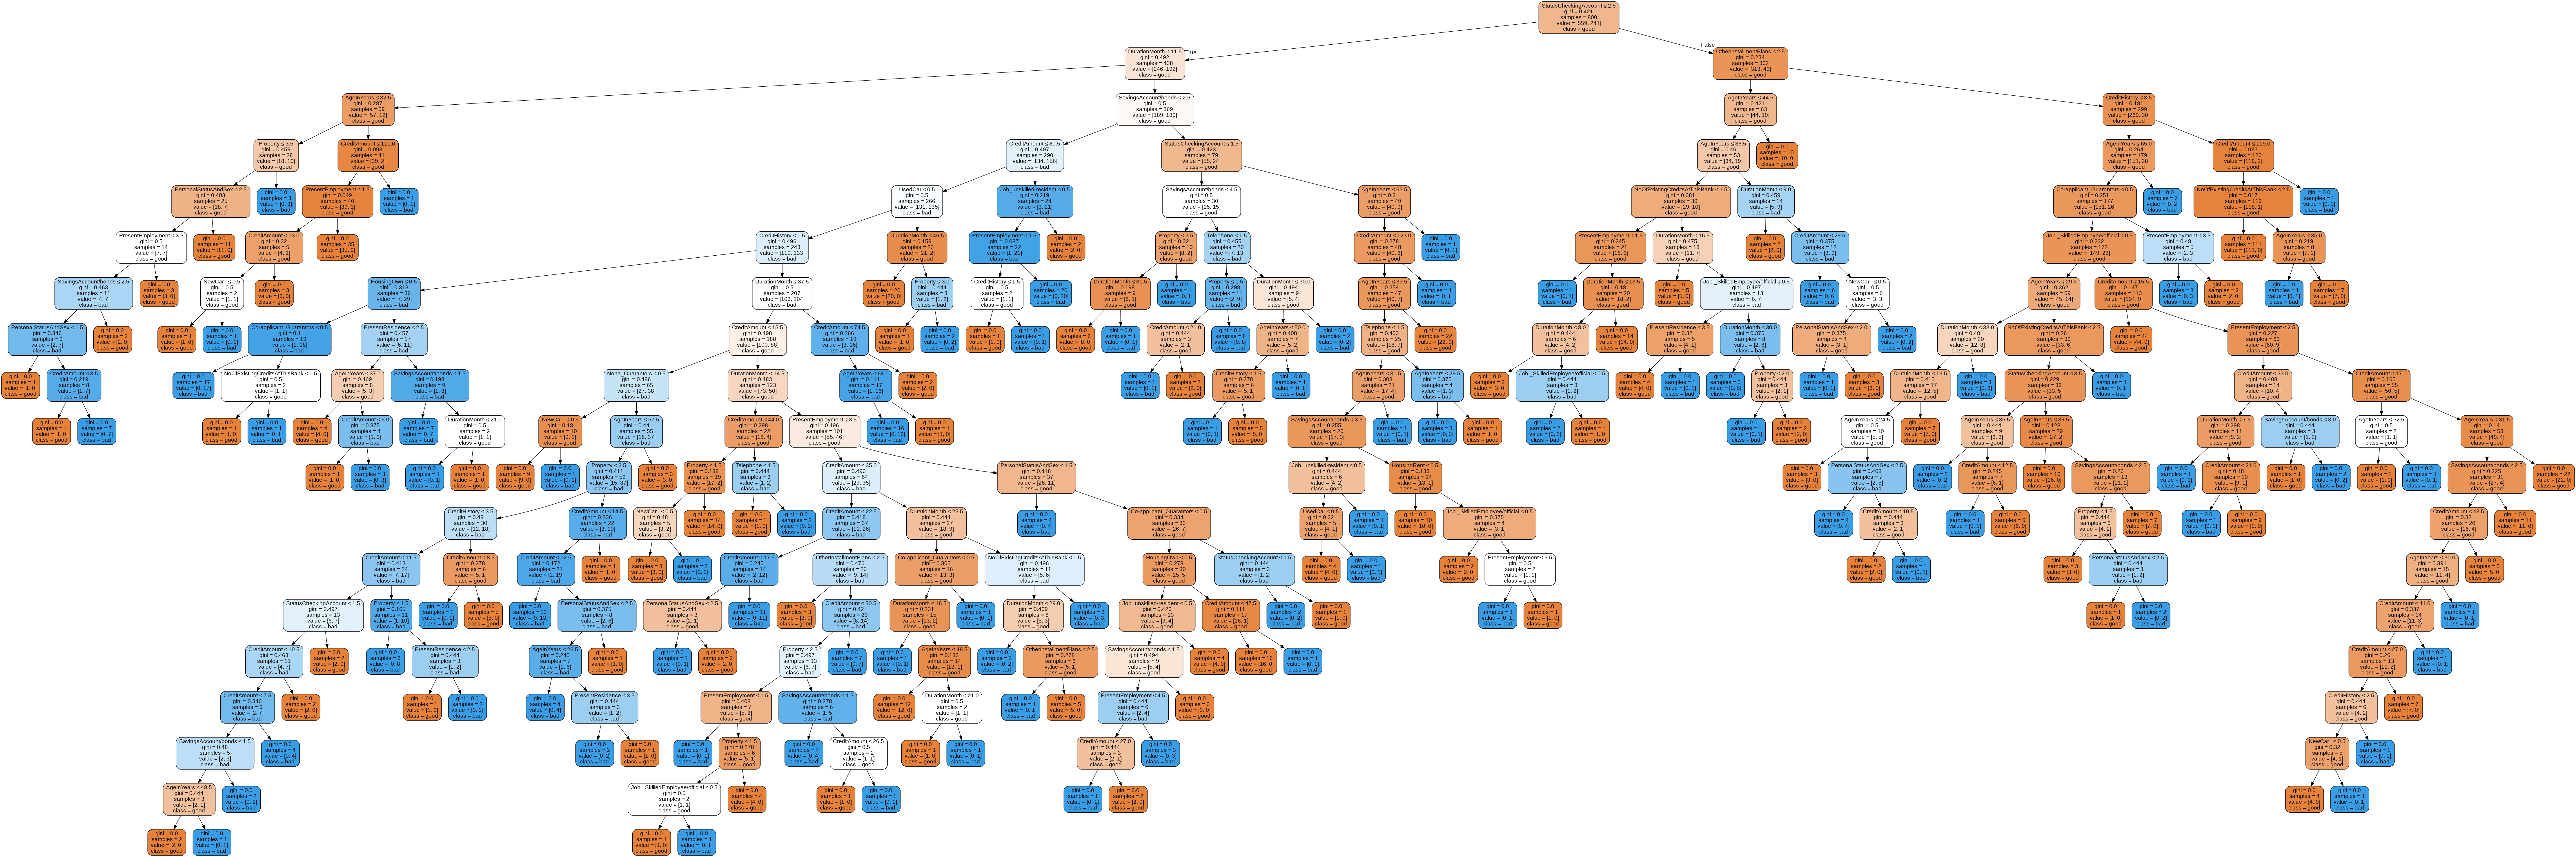

In [0]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(DCTree_model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = data.columns,class_names=['good','bad'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

***Random Forest Classification*** <br>
Random Forest is a classificatin technique in ML to classify multiple classes. From the definition, Random Forest perfroms multiple of Decision Tree.

In [0]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred_RF = RF_model.predict(x_test)
y_pred_RF_prob = RF_model.predict_proba(x_test)[:,1]
RF_accr = accuracy_score(y_pred_RF, y_test)
print("Random Forest Classification Accuracy score: %0.2f" %RF_accr)

Random Forest Classification Accuracy score: 0.77


***SVM Classification*** <br>
State Vector Machine (SVM) is a classification technique that maximizes the margin of training daya by the classification limit (boundary).

In [0]:
from sklearn.svm import SVC
# SVM Model
SVM_model = SVC()
SVM_model.fit(x_train, y_train)
y_pred_SVM = SVM_model.predict(x_test)
SVM_accr = accuracy_score(y_pred_SVM, y_test)
print("SVM Classification Accuracy score: %0.2f" %SVM_accr)

SVM Classification Accuracy score: 0.72


***KNN Classification*** <br>
K-Nearest Neighbor (KNN) classification is a non-parametric, lazy learning algorithm. Its purpose is to use a dataset in which the data points are separated into several classes to predict the classification of a new sample point.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train)
y_pred_KNN = KNN_model.predict(x_test)
y_pred_KNN_prob = KNN_model.predict_proba(x_test)[:, 1]
KNN_accr = accuracy_score(y_pred_KNN, y_test)
print("KNN Classification Accuracy Score: %0.2f" %KNN_accr)

KNN Classification Accuracy Score: 0.68


**7.2 Measure Classification Success**

In [0]:
# Table the accuracy score of each classification
models = pd.DataFrame({
    'Classification Model': ['Naive Bayes', 'Decision Tree', 'Random Forest','SVM', 'KNN'],
    'Score': [ gaussianNB_accr, DCTree_accr, RF_accr, SVM_accr, KNN_accr]})
models.sort_values(by='Classification Model', ascending=False)

Classification Model  Score
3                  SVM  0.725
2        Random Forest  0.770
0          Naive Bayes  0.740
4                  KNN  0.675
1        Decision Tree  0.675

>**Note:** From the result of the accuracy scores, the Random Forest has the most accurate result.

**7.3 What regression objectives should we have? Complete your, add to your Data Story**<br>
By the definition, regression is one of statistical approaches to find the relationship between variables. In ML, it is used to predict the outcome of an event based on the relationship between variables obtained from dataset.<br>
By the regression models, the german banking system can track and treat their cutomers to prevent from the future risk related to credit scores. <br>
Also, regression models can be used to decide whether to provide the services, such as loan or mortgage, or not.


**7.4 Run Regressions using various algorithms**
Two regression techniques are covered in this section:<br>
* Linear Regression
* Logistic Regression

***Linear Regression*** <br>
Linear regression provides a model with relationship as a result between two variables, one is dependent and the other one is independtent. 

In [0]:
german_lr = german_data # prepare dataset into another variable for test-train-split
german_lr.head()

StatusCheckingAccount  ...  CostMatrix
0                      1  ...           1
1                      2  ...           2
2                      4  ...           1
3                      1  ...           1
4                      1  ...           2

[5 rows x 25 columns]

> **Note:** From the pair plot and correlation map, I chose "CreditAmount" and "DurationMonth" columns for the linear regression model because they had the highest score of correlation.

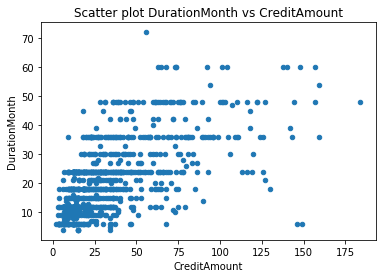

In [0]:
# Scatter plot for DurationMonth vs CreditAmount
scatter_plot = german_lr.plot.scatter(x="CreditAmount", y="DurationMonth", title="Scatter plot DurationMonth vs CreditAmount")

In [0]:
# Linear Regression Prediction
from sklearn.linear_model import LinearRegression
x_lr = german_lr[['CreditAmount']]
y_lr = german_lr[['DurationMonth']]
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr, y_lr, test_size = 0.2, random_state=0)
lr_model = LinearRegression()
lr_model.fit(x_lr_train, y_lr_train)
y_lr_pred = lr_model.predict(x_lr_test)

Text(0, 0.5, 'Duration Month Test (Predict)')

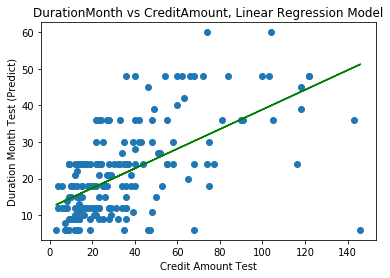

In [0]:
# Plot for the linear regression model
plt.scatter(x_lr_test, y_lr_test)
plt.plot(x_lr_test, y_lr_pred, color="green")
plt.title('DurationMonth vs CreditAmount, Linear Regression Model')
plt.xlabel('Credit Amount Test')
plt.ylabel('Duration Month Test (Predict)')

***Logistic Regression***<br>
Logistic regresion is used to to conduct when the dependent variable is binary.
 find the relationship between independent and dependent variables. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [0]:
# prepare the dataset for the Logistic Regression
german_log = german_data
german_log.head()

StatusCheckingAccount  ...  CostMatrix
0                      1  ...           1
1                      2  ...           2
2                      4  ...           1
3                      1  ...           1
4                      1  ...           2

[5 rows x 25 columns]

In [0]:
# distribute the dataset into data and target variable
x_log = german_log.drop('CostMatrix', axis = 1) # data
y_log = german_log['CostMatrix'] # target
print("X: ", x_log.shape)
print("Y: ", y_log.shape)

X:  (1000, 24)
Y:  (1000,)


In [0]:
# split the dataset into train and test
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log, y_log, test_size = 0.2, random_state =1)
# 20% test, 80% train

In [0]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_log_train, y_log_train)
y_log_pred = log_model.predict(x_log_test)
log_model_accr = accuracy_score(y_log_test, y_log_pred)
print('Logistic Regression Accuracy Score: ', log_model_accr)


Logistic Regression Accuracy Score:  0.76


**7.5 & 7.6 Measure Success of Regressions and Compare Regressions in a table**

In [0]:
print("Linear Regression Score, R^2: %f" % lr_model.score(x_lr_test, y_lr_test))

Linear Regression Score, R^2: 0.355480


In [0]:
log_model_accr = accuracy_score(y_log_test, y_log_pred)
print('Logistic Regression Accuracy Score: ', log_model_accr)

Logistic Regression Accuracy Score:  0.76


***Linear and Logistic Score Table***

| Regression | Score
| :--- | ---:
| Linear | 0.355480
| Logistic | 0.76

>**Note:** I could conclude the Logistic Regression has more trusful result and we can apply this model to the business model, the German banking system.

###**8. Metrics and Evaluation**###

**8.1 & 8.2 F1, R2, RMSE & Precision, Recall, Accuracy**

***Classification Report for Logistic Regression*** 

In [0]:
y_label = y_log.unique() # get the labels of unique value of the target
y_label_chr = ["Good" if x == 1 else "Bad" for x in y_label]
y_label_chr

['Good', 'Bad']

In [0]:
# Classification Report for Logistic Regression
classification_log = classification_report(y_log_test, y_log_pred, target_names=y_label_chr)
print(classification_log)

              precision    recall  f1-score   support

        Good       0.79      0.91      0.84       141
         Bad       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



***Classfication Report for Naive Bayes***

In [0]:
cls_gaussianNB = classification_report(y_test, y_pred_gaussianNB, target_names=y_label_char)
print(cls_gaussianNB)

              precision    recall  f1-score   support

        Good       0.81      0.82      0.82       141
         Bad       0.56      0.54      0.55        59

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



***Classification Report for Decision Tree***

In [0]:
cls_DCTree = classification_report(y_test, y_pred_DCTree, target_names=y_label_char)
print(cls_DCTree)

              precision    recall  f1-score   support

        Good       0.77      0.77      0.77       141
         Bad       0.45      0.46      0.45        59

    accuracy                           0.68       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.68      0.68      0.68       200



***Classification Report for Random Forest***

In [0]:
cls_RF = classification_report(y_test, y_pred_RF, target_names=y_label_char)
print(cls_RF)

              precision    recall  f1-score   support

        Good       0.77      0.96      0.86       141
         Bad       0.78      0.31      0.44        59

    accuracy                           0.77       200
   macro avg       0.78      0.63      0.65       200
weighted avg       0.77      0.77      0.73       200



***Classification Report for SVM***

In [0]:
cls_SVM = classification_report(y_test, y_pred_SVM, target_names=y_label_char)
print(cls_SVM)

              precision    recall  f1-score   support

        Good       0.73      0.98      0.83       141
         Bad       0.70      0.12      0.20        59

    accuracy                           0.73       200
   macro avg       0.71      0.55      0.52       200
weighted avg       0.72      0.72      0.65       200



***Classification Report for KNN***

In [0]:
cls_KNN = classification_report(y_test, y_pred_KNN, target_names=y_label_char)
print(cls_KNN)

              precision    recall  f1-score   support

        Good       0.73      0.84      0.79       141
         Bad       0.42      0.27      0.33        59

    accuracy                           0.68       200
   macro avg       0.58      0.56      0.56       200
weighted avg       0.64      0.68      0.65       200



>**Note:** F1-Socre means the accuracy score of the regression model with Harmonic mean of precision and recall. <br>
Support means the number of samples processed.

**8.3 Conufsion Matrix** <br>
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

***Confusion Matrix for Logistic Regression***

Confusion Matrix for Logistic Regression
 [[128  13]
 [ 35  24]]


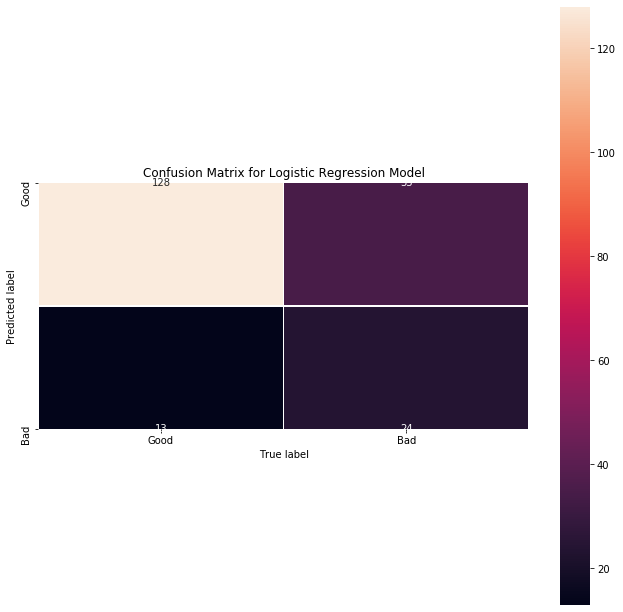

In [0]:
confusion_log = confusion_matrix(y_log_test, y_log_pred)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Logistic Regression Model")
sns.heatmap(confusion_log.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=y_label_chr,
            yticklabels=y_label_chr,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print("Confusion Matrix for Logistic Regression\n", confusion_matrix(y_log_test,y_log_pred))

***Confusion Matrix for Naive Bayes***

              precision    recall  f1-score   support

        Good       0.81      0.82      0.82       141
         Bad       0.56      0.54      0.55        59

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



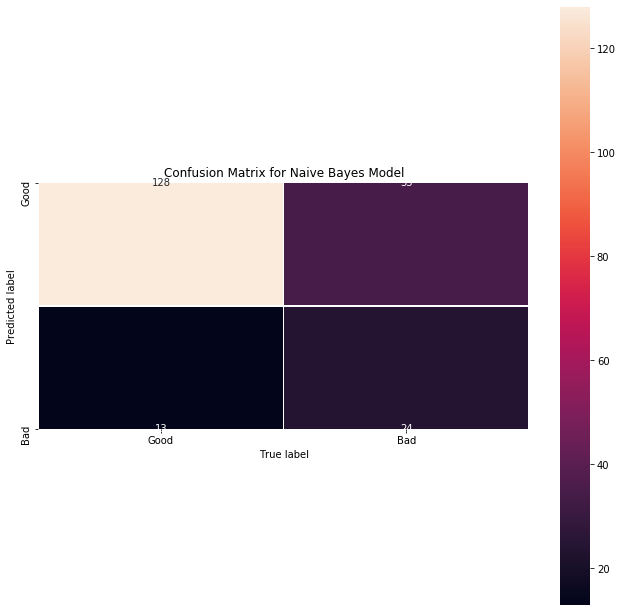

In [0]:
confusion_NB = confusion_matrix(y_test, y_pred_gaussianNB)

fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Naive Bayes Model")
sns.heatmap(confusion_log.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=y_label_char,
            yticklabels=y_label_char,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')

cls_gaussianNB = classification_report(y_test, y_pred_gaussianNB, target_names=y_label_char)
print(cls_gaussianNB)

***Confusion Matrix for Decision Tree***

Confusion Matrix for Decision Tree
 [[108  33]
 [ 32  27]]


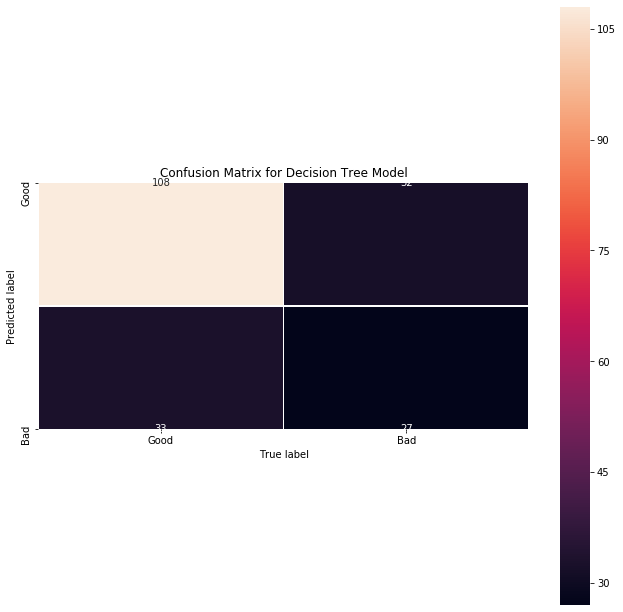

In [0]:
confusion_DCTree = confusion_matrix(y_test, y_pred_DCTree)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Decision Tree Model")
sns.heatmap(confusion_DCTree.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=y_label_char,
            yticklabels=y_label_char,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')
print('Confusion Matrix for Decision Tree\n',confusion_matrix(y_test,y_pred_DCTree))

***Confusion Matrix for Random Forest***

Confusion Matrix for Random Forest
 [[136   5]
 [ 41  18]]


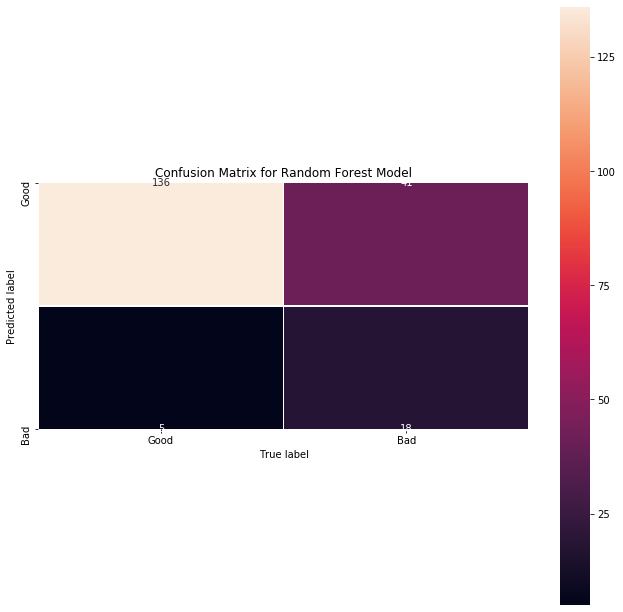

In [0]:
confusion_RF = confusion_matrix(y_test, y_pred_RF)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Random Forest Model")
sns.heatmap(confusion_RF.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=y_label_char,
            yticklabels=y_label_char,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')
print('Confusion Matrix for Random Forest\n',confusion_matrix(y_test,y_pred_RF))

***Confusion Matrix for SVM***

Confusion Matrix for SVM
 [[138   3]
 [ 52   7]]


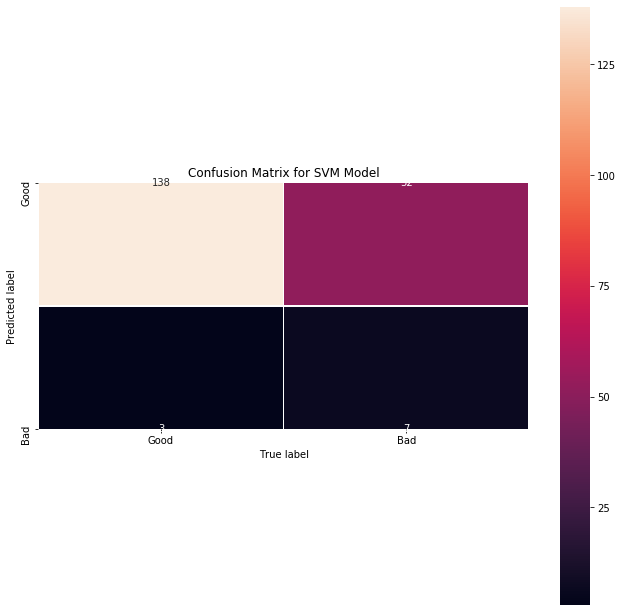

In [0]:
confusion_SVM = confusion_matrix(y_test, y_pred_SVM)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for SVM Model")
sns.heatmap(confusion_SVM.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=y_label_char,
            yticklabels=y_label_char,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')
print('Confusion Matrix for SVM\n',confusion_matrix(y_test,y_pred_SVM))

***Confusion Matrix for KNN***

Confusion Matrix for
 [[119  22]
 [ 43  16]]


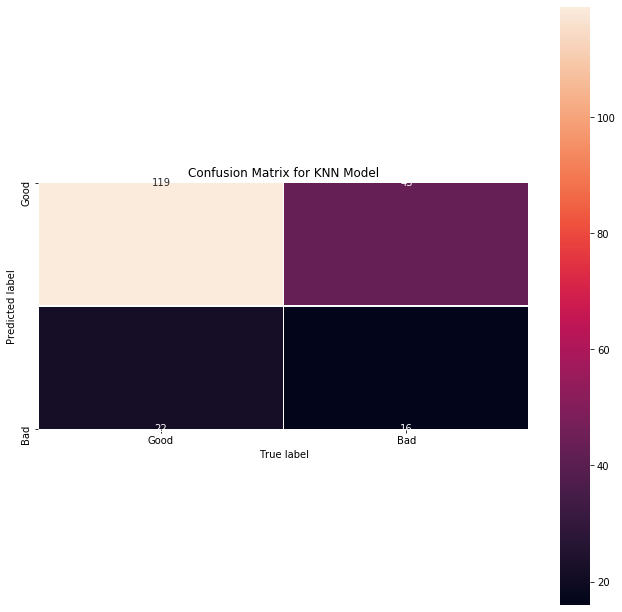

In [0]:
confusion_KNN = confusion_matrix(y_test, y_pred_KNN)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for KNN Model")
sns.heatmap(confusion_KNN.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=y_label_char,
            yticklabels=y_label_char,linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')
print('Confusion Matrix for\n',confusion_matrix(y_test,y_pred_KNN))

**8.4 Other metric as applicable to your project**

***ROC Curve for Logistic Regression Model*** <br>
Reciever Operating Characteristic (ROC) curve is used to describe the tradeoff between the true positive and the false positive of a classification. <br>
Idle classification has the result with the true positive rate of 1 and the false postive ratio of 0.

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

def rocCurve(actual, predicted):
    [fpr, tpr, thresholds] = roc_curve( actual, predicted, 
                                                  drop_intermediate = False )
    auc_score = roc_auc_score( actual, predicted )
    #roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    #plt.show()
    return fpr, tpr, thresholds

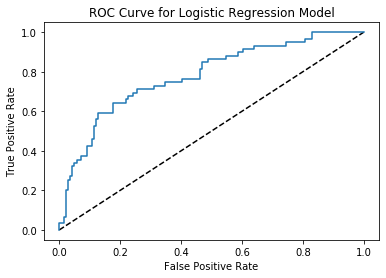

In [0]:
# Generate ROC curve values: fpr, tpr, thresholds
y_log_pred_prob = log_model.predict_proba(x_log_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_log_test, y_log_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.show()

***ROC for Naive Bayes***

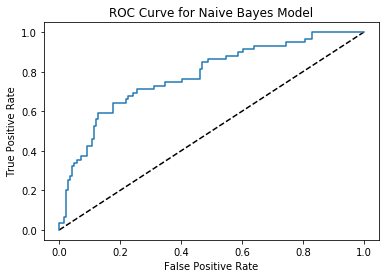

In [0]:
# Generate ROC curve values: fpr, tpr, thresholds
y_log_pred_prob = log_model.predict_proba(x_log_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_log_test, y_log_pred_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.show()

***ROC Curve for Decision Tree***

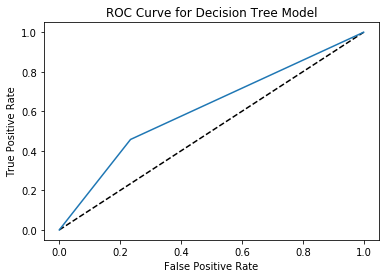

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DCTree_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.show()

***ROC Curve for Random Forest***

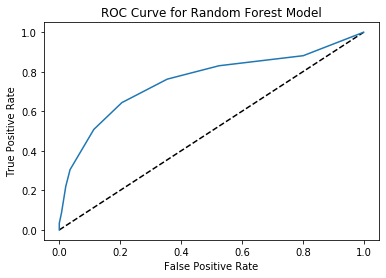

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF_prob, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.show()

***Feature Impotances for Random Forest*** <a name="feature_importance_RF"></a>

[0.11170041 0.09907909 0.07495412 0.14031923 0.04652296 0.05196831
 0.04416333 0.04220397 0.04632667 0.09971425 0.03945554 0.0201621
 0.0141828  0.02061334 0.00486428 0.02616139 0.01709699 0.02111731
 0.01120872 0.01234499 0.02266734 0.00467761 0.01052426 0.017971  ]


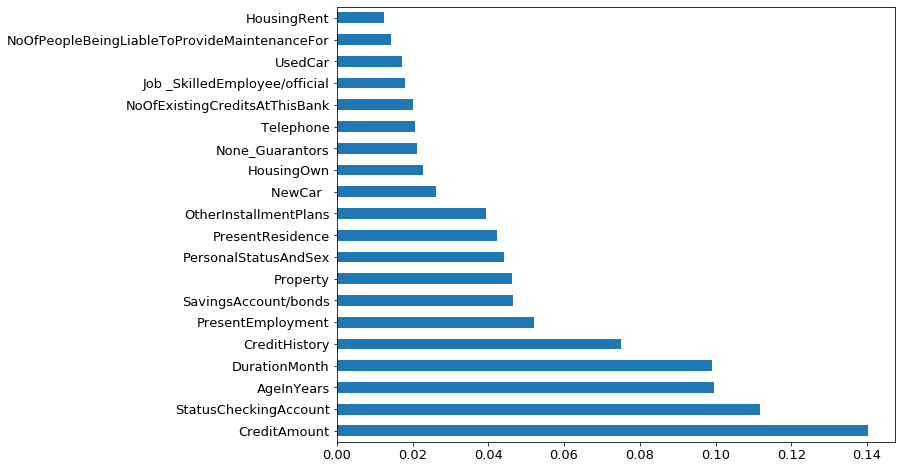

In [0]:
RF_importance = RF_model.feature_importances_
print(RF_importance)
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,8))
feature_importances = pd.Series(RF_model.feature_importances_, index=data.columns)
feature_importances.nlargest(20).plot(kind='barh',fontsize=13)
plt.show()

>**Note:** Columns of more amount of unique data have higher feature importances.

***ROC Curve for KNN***

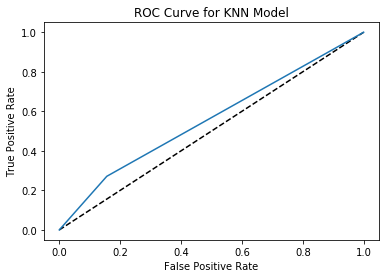

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN, pos_label=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.show()

###**9. Distillation**###
In the Distillation process, we make the dataset more simpler and more optimizable for certain cases. For example, with PCA (Principal Component Analysis), we can reduce the dimension of the dataset and analyze it more easily.

***PCA*** <br>
Principal Component Analysis (PCA) is an algorithm to find the pattern of the dataset more eaily and effectivley by reducing the dimension of the dataset. It is a unsupervised linear alogorithm.

In [0]:
from sklearn.decomposition import PCA 
pca = PCA(random_state=0)
german_data_pca = german_data # preapre PCA dataset, sample
pca.fit(german_data_pca)
german_pca_array = pca.transform(german_data_pca)
german_pca = pd.DataFrame(german_pca_array)
var_ratio = pca.explained_variance_ratio_
print("Variance ratio of PCA Model:",var_ratio)
sv = pca.singular_values_
print("Singular Value of the Model:",sv)

Variance ratio of PCA Model: [7.94120859e-01 1.20527282e-01 7.46177956e-02 2.52692913e-03
 1.48253637e-03 1.40144214e-03 9.98502758e-04 9.46885648e-04
 8.08620103e-04 4.75888061e-04 4.35070967e-04 2.82208516e-04
 2.35355272e-04 2.24353918e-04 2.01420088e-04 1.73409403e-04
 1.35602047e-04 1.10396073e-04 9.39320157e-05 6.91084403e-05
 4.52000503e-05 2.98155703e-05 2.71221188e-05 1.58377190e-05
 1.44270842e-05]
Singular Value of the Model: [927.84479661 361.4720456  284.4154879   52.33937906  40.08987601
  38.9780062   32.90081598  32.03913643  29.60767479  22.71351978
  21.71761282  17.49109878  15.97327618  15.59548424  14.77690309
  13.71097554  12.12453684  10.93978653  10.09110804   8.65560802
   7.00005567   5.68530274   5.42242859   4.14360503   3.9547708 ]


Text(0, 0.5, 'Age in years')

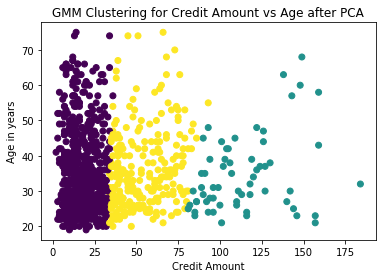

In [0]:
pca = PCA(n_components=2)
pca.fit(german_data_pca)
plt.scatter(german_data_pca['CreditAmount'],german_data_pca['AgeInYears'],c=labels)
plt.title('GMM Clustering for Credit Amount vs Age after PCA')
plt.xlabel("Credit Amount")
plt.ylabel("Age in years")

>**Note:** By comparison of the original GMM clustering [Link](#GMM), we could find more vivid pattern of the datset in terms of visualization.

**9.1 Entity Identification**

**9.2 Customer Rank**<br>
In this section, we could distill the dataset or sort the dataset by certain orders. For example, I sorted by the credit amount of customers in the dataset.

In [0]:
german_data_rank = german_data
german_data_rank.sort_values("CreditAmount", inplace=True)
# german_data_rank.head()
german_data_rank["Rank"] = german_data_rank["CreditAmount"].rank(method='average')
german_data_rank

StatusCheckingAccount  DurationMonth  ...  CostMatrix    Rank
725                      4              6  ...           1     1.0
309                      2              9  ...           1     3.5
157                      1             12  ...           1     3.5
177                      1              6  ...           1     3.5
458                      1              6  ...           1     3.5
..                     ...            ...  ...         ...     ...
637                      4             60  ...           1   996.5
887                      2             48  ...           2   996.5
95                       2             54  ...           2   998.5
818                      1             36  ...           1   998.5
915                      2             48  ...           2  1000.0

[1000 rows x 26 columns]

>**Note:** Sorting (Ranking) by CreditAmount was successful

**9.3 Sentiment** <br>
Sentiment means analyzing an opinion or feelings about something using data in various types of usage. For example, in the German dataset, we could analyze the sentiment of the dataset if a customer has risk in their credit.

In [0]:
# analyze data for sentiment analysis
german_data_sent = german_data
german_data_sent.head()

StatusCheckingAccount  DurationMonth  ...  CostMatrix  Rank
725                      4              6  ...           1   1.0
309                      2              9  ...           1   3.5
157                      1             12  ...           1   3.5
177                      1              6  ...           1   3.5
458                      1              6  ...           1   3.5

[5 rows x 26 columns]

>**Note:** the CostMatrix column indicates that if the customer is good or bad in their credit score.

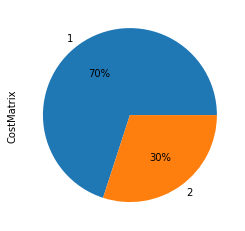

In [0]:
german_data_sent.CostMatrix.value_counts().plot(kind='pie', autopct='%1.0f%%')

>**Note:** Since 1 means good credit in the CostMatrix column and 2 means bad, We can conclude that 70% of the customers are trustful or safe in their credit and 30% are not. 

**9.4 Topic Modeling**

###**10. Conclusion**###
Based on the results, 70% of the customers in the german bank were considered as "Good" in terms of credit score. I provided various ways to predict desired patterns and result. For example, we can use logistic regression for find the patterns in the dataset with 76% accuracy score. We can use various classifications for classifying the data based on the credit scores. This whole process can be used as a guidance for staff in the bank.